In [2]:
#this script reads out tecan raw OD data and plots growth curves 
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import numpy as np

import sys
sys.path.append("") #add import path so I can import the param fit library
from monogLV_functions import *#functions for fitting model to the data
from ODE_fit import *


#colors for the graph
cpallet = ["#6CC860","#8CC860","#C4E54C","#F7DD48","#F5A232","#FC8609","#FE6315"]
clist = []
for c in cpallet:
    clist.append(c)
    clist.append(c)
clist = clist*3

os.chdir("/mnt/rdrive/venturelli/General/Freeman/projects/BF")
os.listdir()
df = pd.read_excel("BF-growthcurve4.xlsx", index_col = 0, header = 1, skiprows = 36)
df = df.dropna()
df = df.drop("Temp. [°C]", axis = 0)
df

0.0       1799.9    3600.1    5400.3    7200.6    9000.8    10801.0   \
Time [s]                                                                        
B2         0.1145    0.1152    0.1170    0.1200    0.1240    0.1291    0.1352   
C2         0.1146    0.1153    0.1173    0.1200    0.1240    0.1292    0.1354   
D2         0.1171    0.1147    0.1165    0.1179    0.1202    0.1236    0.1258   
E2          0.112    0.1097    0.1120    0.1139    0.1161    0.1189    0.1221   
F2         0.1293    0.1324    0.1382    0.1464    0.1586    0.1770    0.2041   
G2         0.1279    0.1303    0.1364    0.1446    0.1566    0.1746    0.2014   
B3         0.1144    0.1145    0.1154    0.1170    0.1201    0.1242    0.1294   
C3         0.1155    0.1166    0.1178    0.1196    0.1223    0.1263    0.1314   
D3         0.1098    0.1115    0.1116    0.1115    0.1123    0.1135    0.1146   
E3         0.1073    0.1107    0.1108    0.1111    0.1121    0.1131    0.1144   
F3         0.1269    0.1292    0.1327    0.1375    0.1448    0.1552    0.1701   
G3         0.1242    0.1270    0.1307    0.1356    0.1433    0.1543    0.1693   
B4          0.114    0.1143    0.1146    0.1155    0.1173    0.1199    0.1237   
C4         0.1144    0.1145    0.1154    0.1166    0.1180    0.1208    0.1245   
D4         0.1063    0.1081    0.1081    0.1084    0.1090    0.1099    0.1110   
E4         0.1054    0.1054    0.1052    0.1056    0.1063    0.1073    0.1080   
F4         0.1261    0.1267    0.1285    0.1309    0.1350    0.1416    0.1512   
G4         0.1242    0.1258    0.1276    0.1302    0.1343    0.1407    0.1500   
B5         0.1129    0.1148    0.1158    0.1165    0.1192    0.1233    0.1288   
C5         0.1135    0.1144    0.1155    0.1172    0.1199    0.1237    0.1291   
D5         0.1037    0.1056    0.1048    0.1051    0.1069    0.1074    0.1087   
E5         0.1104    0.1100    0.1093    0.1098    0.1109    0.1122    0.1132   
F5         0.1247    0.1262    0.1289    0.1330    0.1402    0.1510    0.1663   
G5         0.1239    0.1262    0.1293    0.1339    0.1411    0.1520    0.1675   
B6         0.1156    0.1168    0.1184    0.1205    0.1238    0.1286    0.1349   
C6         0.1133    0.1143    0.1157    0.1177    0.1210    0.1255    0.1315   
D6         0.1012    0.1070    0.1087    0.1100    0.1113    0.1127    0.1140   
E6          0.102    0.1069    0.1083    0.1093    0.1106    0.1120    0.1133   
F6          0.126    0.1281    0.1314    0.1372    0.1460    0.1597    0.1796   
G6         0.1272    0.1295    0.1329    0.1388    0.1483    0.1617    0.1810   
B7         0.1147    0.1156    0.1165    0.1179    0.1202    0.1236    0.1283   
C7         0.1122    0.1127    0.1138    0.1152    0.1174    0.1207    0.1252   
D7         0.1007    0.1067    0.1077    0.1085    0.1096    0.1105    0.1115   
E7         0.1091    0.1106    0.1115    0.1122    0.1130    0.1138    0.1146   
F7         0.1297    0.1313    0.1342    0.1379    0.1441    0.1539    0.1674   
G7         0.1276    0.1293    0.1321    0.1358    0.1422    0.1518    0.1653   
B8         0.1131    0.1147    0.1156    0.1174    0.1210    0.1257    0.1318   
C8         0.1155    0.1160    0.1171    0.1191    0.1224    0.1269    0.1330   
D8         0.1058    0.1113    0.1126    0.1142    0.1158    0.1179    0.1202   
E8         0.1085    0.1108    0.1126    0.1140    0.1159    0.1178    0.1201   
F8         0.1333    0.1347    0.1397    0.1467    0.1578    0.1740    0.1983   
G8          0.128    0.1306    0.1354    0.1424    0.1534    0.1697    0.1930   
B9         0.1132    0.1140    0.1153    0.1171    0.1201    0.1245    0.1302   
C9         0.1145    0.1152    0.1165    0.1184    0.1210    0.1254    0.1310   
D9         0.1067    0.1089    0.1102    0.1112    0.1123    0.1133    0.1147   
E9         0.1097    0.1116    0.1124    0.1135    0.1148    0.1160    0.1170   
F9         0.1248    0.1274    0.1310    0.1360    0.1439    0.1558    0.1730   
G9          0.127    0.1297    0.1331   

In [3]:
#make a label list for each condition for each well

#It goes, B-G, then 2 - 11 by this order
#first loop (B-G) goes: BHI1-3, SBM 1-3
firstloop = ["SBM1","SBM2", "BMM1", "BMM2", "BHIS1", "BHIS2"]
#second loop goes DH, BG, AE, OFF1, WT, OFF2, OFF3, OFF4, delMPI, Blank
secondloop = ["WT", "DH", "DH2", "BG", "AE", "OFF1", "OFF2", "OFF3", "OFF4", "Blank"]

#make list of labels
label_list = []
for j in range(len(secondloop)):
    for i in range(len(firstloop)):
        label = secondloop[j]+"-"+firstloop[i]
        label_list.append(label)
        
#add label to the DF
newdf = df.copy()
newdf.index = label_list

#make sure the data is numerical
newdf = newdf.astype(float)

#fix the columns to be in hours instead of seconds
newdf.columns = df.columns/3600

newdf

0.000000   0.499972   1.000028   1.500083   2.000167   2.500222   \
WT-SBM1         0.1145     0.1152     0.1170     0.1200     0.1240     0.1291   
WT-SBM2         0.1146     0.1153     0.1173     0.1200     0.1240     0.1292   
WT-BMM1         0.1171     0.1147     0.1165     0.1179     0.1202     0.1236   
WT-BMM2         0.1120     0.1097     0.1120     0.1139     0.1161     0.1189   
WT-BHIS1        0.1293     0.1324     0.1382     0.1464     0.1586     0.1770   
WT-BHIS2        0.1279     0.1303     0.1364     0.1446     0.1566     0.1746   
DH-SBM1         0.1144     0.1145     0.1154     0.1170     0.1201     0.1242   
DH-SBM2         0.1155     0.1166     0.1178     0.1196     0.1223     0.1263   
DH-BMM1         0.1098     0.1115     0.1116     0.1115     0.1123     0.1135   
DH-BMM2         0.1073     0.1107     0.1108     0.1111     0.1121     0.1131   
DH-BHIS1        0.1269     0.1292     0.1327     0.1375     0.1448     0.1552   
DH-BHIS2        0.1242     0.1270     0.1307     0.1356     0.1433     0.1543   
DH2-SBM1        0.1140     0.1143     0.1146     0.1155     0.1173     0.1199   
DH2-SBM2        0.1144     0.1145     0.1154     0.1166     0.1180     0.1208   
DH2-BMM1        0.1063     0.1081     0.1081     0.1084     0.1090     0.1099   
DH2-BMM2        0.1054     0.1054     0.1052     0.1056     0.1063     0.1073   
DH2-BHIS1       0.1261     0.1267     0.1285     0.1309     0.1350     0.1416   
DH2-BHIS2       0.1242     0.1258     0.1276     0.1302     0.1343     0.1407   
BG-SBM1         0.1129     0.1148     0.1158     0.1165     0.1192     0.1233   
BG-SBM2         0.1135     0.1144     0.1155     0.1172     0.1199     0.1237   
BG-BMM1         0.1037     0.1056     0.1048     0.1051     0.1069     0.1074   
BG-BMM2         0.1104     0.1100     0.1093     0.1098     0.1109     0.1122   
BG-BHIS1        0.1247     0.1262     0.1289     0.1330     0.1402     0.1510   
BG-BHIS2        0.1239     0.1262     0.1293     0.1339     0.1411     0.1520   
AE-SBM1         0.1156     0.1168     0.1184     0.1205     0.1238     0.1286   
AE-SBM2         0.1133     0.1143     0.1157     0.1177     0.1210     0.1255   
AE-BMM1         0.1012     0.1070     0.1087     0.1100     0.1113     0.1127   
AE-BMM2         0.1020     0.1069     0.1083     0.1093     0.1106     0.1120   
AE-BHIS1        0.1260     0.1281     0.1314     0.1372     0.1460     0.1597   
AE-BHIS2        0.1272     0.1295     0.1329     0.1388     0.1483     0.1617   
OFF1-SBM1       0.1147     0.1156     0.1165     0.1179     0.1202     0.1236   
OFF1-SBM2       0.1122     0.1127     0.1138     0.1152     0.1174     0.1207   
OFF1-BMM1       0.1007     0.1067     0.1077     0.1085     0.1096     0.1105   
OFF1-BMM2       0.1091     0.1106     0.1115     0.1122     0.1130     0.1138   
OFF1-BHIS1      0.1297     0.1313     0.1342     0.1379     0.1441     0.1539   
OFF1-BHIS2      0.1276     0.1293     0.1321     0.1358     0.1422     0.1518   
OFF2-SBM1       0.1131     0.1147     0.1156     0.1174     0.1210     0.1257   
OFF2-SBM2       0.1155     0.1160     0.1171     0.1191     0.1224     0.1269   
OFF2-BMM1       0.1058     0.1113     0.1126     0.1142     0.1158     0.1179   
OFF2-BMM2       0.1085     0.1108     0.1126     0.1140     0.1159     0.1178   
OFF2-BHIS1      0.1333     0.1347     0.1397     0.1467     0.1578     0.1740   
OFF2-BHIS2      0.1280     0.1306     0.1354     0.1424     0.1534     0.1697   
OFF3-SBM1       0.1132     0.1140     0.1153     0.1171     0.1201     0.1245   
OFF3-SBM2       0.1145     0.1152     0.1165     0.1184     0.1210     0.1254   
OFF3-BMM1       0.1067     0.1089     0.1102     0.1112     0.1123     0.1133   
OFF3-BMM2       0.1097     0.1116     0.1124     0.1135     0.1148     0.1160   
OFF3-BHIS1      0.1248     0.1274     0.1310     0.1360     0.1439     0.1558   
OFF3-BHIS2      0.1270     0.1297     0.1331     0.1385     0.1470     0.1596   
OFF4-SBM1       0.1149     0.1158     0.1173

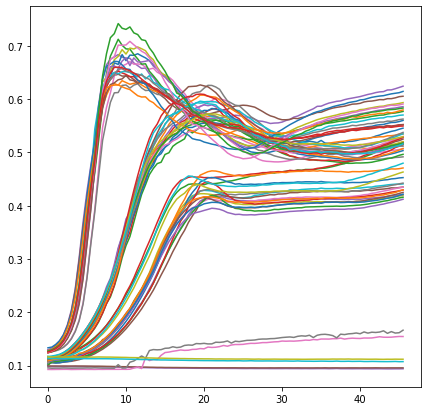

In [4]:
#plot all these curves to take a look
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines

plt.figure(figsize = [7,7])

for i, row in newdf.iterrows():
    plt.plot(row, label = i)


In [5]:
#Truncate all data to remove death phase
truncate = 23 #the time at which the curve starts getting weird
newdf = newdf.truncate(after = truncate, axis = "columns")
newdf

0.000000   0.499972   1.000028   1.500083   2.000167   2.500222   \
WT-SBM1         0.1145     0.1152     0.1170     0.1200     0.1240     0.1291   
WT-SBM2         0.1146     0.1153     0.1173     0.1200     0.1240     0.1292   
WT-BMM1         0.1171     0.1147     0.1165     0.1179     0.1202     0.1236   
WT-BMM2         0.1120     0.1097     0.1120     0.1139     0.1161     0.1189   
WT-BHIS1        0.1293     0.1324     0.1382     0.1464     0.1586     0.1770   
WT-BHIS2        0.1279     0.1303     0.1364     0.1446     0.1566     0.1746   
DH-SBM1         0.1144     0.1145     0.1154     0.1170     0.1201     0.1242   
DH-SBM2         0.1155     0.1166     0.1178     0.1196     0.1223     0.1263   
DH-BMM1         0.1098     0.1115     0.1116     0.1115     0.1123     0.1135   
DH-BMM2         0.1073     0.1107     0.1108     0.1111     0.1121     0.1131   
DH-BHIS1        0.1269     0.1292     0.1327     0.1375     0.1448     0.1552   
DH-BHIS2        0.1242     0.1270     0.1307     0.1356     0.1433     0.1543   
DH2-SBM1        0.1140     0.1143     0.1146     0.1155     0.1173     0.1199   
DH2-SBM2        0.1144     0.1145     0.1154     0.1166     0.1180     0.1208   
DH2-BMM1        0.1063     0.1081     0.1081     0.1084     0.1090     0.1099   
DH2-BMM2        0.1054     0.1054     0.1052     0.1056     0.1063     0.1073   
DH2-BHIS1       0.1261     0.1267     0.1285     0.1309     0.1350     0.1416   
DH2-BHIS2       0.1242     0.1258     0.1276     0.1302     0.1343     0.1407   
BG-SBM1         0.1129     0.1148     0.1158     0.1165     0.1192     0.1233   
BG-SBM2         0.1135     0.1144     0.1155     0.1172     0.1199     0.1237   
BG-BMM1         0.1037     0.1056     0.1048     0.1051     0.1069     0.1074   
BG-BMM2         0.1104     0.1100     0.1093     0.1098     0.1109     0.1122   
BG-BHIS1        0.1247     0.1262     0.1289     0.1330     0.1402     0.1510   
BG-BHIS2        0.1239     0.1262     0.1293     0.1339     0.1411     0.1520   
AE-SBM1         0.1156     0.1168     0.1184     0.1205     0.1238     0.1286   
AE-SBM2         0.1133     0.1143     0.1157     0.1177     0.1210     0.1255   
AE-BMM1         0.1012     0.1070     0.1087     0.1100     0.1113     0.1127   
AE-BMM2         0.1020     0.1069     0.1083     0.1093     0.1106     0.1120   
AE-BHIS1        0.1260     0.1281     0.1314     0.1372     0.1460     0.1597   
AE-BHIS2        0.1272     0.1295     0.1329     0.1388     0.1483     0.1617   
OFF1-SBM1       0.1147     0.1156     0.1165     0.1179     0.1202     0.1236   
OFF1-SBM2       0.1122     0.1127     0.1138     0.1152     0.1174     0.1207   
OFF1-BMM1       0.1007     0.1067     0.1077     0.1085     0.1096     0.1105   
OFF1-BMM2       0.1091     0.1106     0.1115     0.1122     0.1130     0.1138   
OFF1-BHIS1      0.1297     0.1313     0.1342     0.1379     0.1441     0.1539   
OFF1-BHIS2      0.1276     0.1293     0.1321     0.1358     0.1422     0.1518   
OFF2-SBM1       0.1131     0.1147     0.1156     0.1174     0.1210     0.1257   
OFF2-SBM2       0.1155     0.1160     0.1171     0.1191     0.1224     0.1269   
OFF2-BMM1       0.1058     0.1113     0.1126     0.1142     0.1158     0.1179   
OFF2-BMM2       0.1085     0.1108     0.1126     0.1140     0.1159     0.1178   
OFF2-BHIS1      0.1333     0.1347     0.1397     0.1467     0.1578     0.1740   
OFF2-BHIS2      0.1280     0.1306     0.1354     0.1424     0.1534     0.1697   
OFF3-SBM1       0.1132     0.1140     0.1153     0.1171     0.1201     0.1245   
OFF3-SBM2       0.1145     0.1152     0.1165     0.1184     0.1210     0.1254   
OFF3-BMM1       0.1067     0.1089     0.1102     0.1112     0.1123     0.1133   
OFF3-BMM2       0.1097     0.1116     0.1124     0.1135     0.1148     0.1160   
OFF3-BHIS1      0.1248     0.1274     0.1310     0.1360     0.1439     0.1558   
OFF3-BHIS2      0.1270     0.1297     0.1331     0.1385     0.1470     0.1596   
OFF4-SBM1       0.1149     0.1158     0.1173

In [10]:
#plot all raw OD curves for SBM media
sbmdf = newdf.loc[[i for i in newdf.index if i.find("SBM") != -1]]

plt.figure(figsize = [7,7])

for i, row in sbmdf.iterrows():
    plt.plot(row, label = i)
plt.savefig("rawSBMcurves.svg")

In [5]:
#normalize data to between 0 and 1 by subtracting by the min and then dividing by the range (new max) for each row
normdf = newdf.subtract(newdf.min(axis = 1), axis = 0)
normdf = normdf.div(normdf.max(axis = 1), axis = 0)
normdf


0.000000   0.499972   1.000028   1.500083   2.000167   2.500222   \
WT-SBM1       0.000000   0.001586   0.005664   0.012460   0.021522   0.033077   
WT-SBM2       0.000000   0.001545   0.005960   0.011921   0.020751   0.032230   
WT-BMM1       0.007286   0.000000   0.005464   0.009715   0.016697   0.027019   
WT-BMM2       0.006669   0.000000   0.006669   0.012177   0.018556   0.026674   
WT-BHIS1      0.000000   0.005593   0.016056   0.030850   0.052859   0.086054   
WT-BHIS2      0.000000   0.004625   0.016381   0.032183   0.055309   0.089998   
DH-SBM1       0.000000   0.000205   0.002052   0.005334   0.011695   0.020107   
DH-SBM2       0.000000   0.002155   0.004506   0.008033   0.013323   0.021160   
DH-BMM1       0.000000   0.005437   0.005756   0.005437   0.007995   0.011832   
DH-BMM2       0.000000   0.010575   0.010886   0.011820   0.014930   0.018040   
DH-BHIS1      0.000000   0.004120   0.010389   0.018986   0.032062   0.050690   
DH-BHIS2      0.000000   0.005486   0.012735   0.022335   0.037422   0.058973   
DH2-SBM1      0.000000   0.000672   0.001343   0.003359   0.007389   0.013211   
DH2-SBM2      0.000000   0.000214   0.002136   0.004700   0.007691   0.013672   
DH2-BMM1      0.000000   0.005788   0.005788   0.006752   0.008682   0.011576   
DH2-BMM2      0.000634   0.000634   0.000000   0.001268   0.003487   0.006656   
DH2-BHIS1     0.000000   0.001102   0.004409   0.008819   0.016351   0.028477   
DH2-BHIS2     0.000000   0.003170   0.006737   0.011888   0.020012   0.032693   
BG-SBM1       0.000000   0.004147   0.006329   0.007857   0.013749   0.022698   
BG-SBM2       0.000000   0.001865   0.004143   0.007665   0.013259   0.021131   
BG-BMM1       0.000000   0.005441   0.003150   0.004009   0.009164   0.010596   
BG-BMM2       0.003089   0.001966   0.000000   0.001404   0.004493   0.008144   
BG-BHIS1      0.000000   0.002552   0.007147   0.014123   0.026374   0.044751   
BG-BHIS2      0.000000   0.004350   0.010214   0.018914   0.032533   0.053149   
AE-SBM1       0.000000   0.002534   0.005912   0.010346   0.017314   0.027449   
AE-SBM2       0.000000   0.001948   0.004675   0.008570   0.014998   0.023763   
AE-BMM1       0.000000   0.018644   0.024108   0.028287   0.032465   0.036966   
AE-BMM2       0.000000   0.014903   0.019161   0.022202   0.026156   0.030414   
AE-BHIS1      0.000000   0.003672   0.009442   0.019584   0.034971   0.058926   
AE-BHIS2      0.000000   0.004385   0.010867   0.022116   0.040229   0.065777   
OFF1-SBM1     0.000000   0.001924   0.003848   0.006841   0.011757   0.019025   
OFF1-SBM2     0.000000   0.001009   0.003230   0.006056   0.010497   0.017158   
OFF1-BMM1     0.000000   0.018838   0.021978   0.024490   0.027943   0.030769   
OFF1-BMM2     0.000000   0.004471   0.007154   0.009240   0.011624   0.014009   
OFF1-BHIS1    0.000000   0.002920   0.008212   0.014963   0.026277   0.044161   
OFF1-BHIS2    0.000000   0.003289   0.008706   0.015864   0.028245   0.046818   
OFF2-SBM1     0.000000   0.003691   0.005767   0.009919   0.018224   0.029066   
OFF2-SBM2     0.000000   0.001086   0.003476   0.007821   0.014990   0.024766   
OFF2-BMM1     0.000000   0.016497   0.020396   0.025195   0.029994   0.036293   
OFF2-BMM2     0.000000   0.006623   0.011805   0.015836   0.021307   0.026778   
OFF2-BHIS1    0.000000   0.002603   0.011900   0.024916   0.045556   0.075679   
OFF2-BHIS2    0.000000   0.005213   0.014836   0.028869   0.050922   0.083601   
OFF3-SBM1     0.000000   0.001787   0.004691   0.008711   0.015412   0.025240   
OFF3-SBM2     0.000000   0.001414   0.004040   0.007879   0.013131   0.022020   
OFF3-BMM1     0.000000   0.007626   0.012132   0.015598   0.019411   0.022877   
OFF3-BMM2     0.000000   0.006207   0.008821   0.012414   0.016661   0.020581   
OFF3-BHIS1    0.000000   0.004455   0.010624   0.019191   0.032728   0.053119   
OFF3-BHIS2    0.000000   0.005095   0.011512   0.021702   0.037743   0.061521   
OFF4-SBM1     0.000000   0.001966   0.005244

In [16]:
#plot some of these normalized curves for SBM media
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines

sampledf = normdf
samples = set([i for i in sampledf.index if (i.find("SBM") != -1 and i.find("Blank") == -1)])
sampledf = sampledf.loc[samples]


plt.figure(figsize = [7,7])

for i, row in sampledf.iterrows():
    plt.plot(row, label = i)

plt.legend()

#xvals = range(15, 25, 1)
#labelLines(plt.gca().get_lines(), xvals = xvals)
#labelLines(plt.gca().get_lines())

In [114]:
#here's the ODE function, paramters r = growthrate, alpha = self interaction
def monogLV(OD, t, r, alpha): 
    dODdt = OD*(r + OD*alpha) #monospecies gLV
    return dODdt

#x0 parameters are: (r - growthrate, alpha - self interaction, y0 - beginning OD)
x0 = (1, -1, 0.05) #initial parameter estimates
condition = "DH-SBM1"
lowerbounds = [0,-99,0.001]
upperbounds = [math.inf,1, 1]
data = normdf.loc[condition] #gotta remove the death phase data
data = data.truncate(before = lagtime, after = data.idxmax()) 


#define the model to fit, it's gLV with fixed carrying capacity which means r/alpha = 1, or alpha = r
fitparams = fit(x0, lowerbounds, upperbounds, data, monogLV)

plotfit(fitparams, data, monogLV)

array([[0.01356117],
       [0.01670302],
       [0.02055778],
       [0.02527849],
       [0.03104801],
       [0.03808063],
       [0.04662683],
       [0.05697397],
       [0.06944322],
       [0.08438833],
       [0.10218356],
       [0.12320861],
       [0.1478186 ],
       [0.17631679],
       [0.20890765],
       [0.24565267],
       [0.28641577],
       [0.33083964],
       [0.37832221],
       [0.4280353 ],
       [0.47896358],
       [0.52998437],
       [0.57998341],
       [0.62791546],
       [0.67291675],
       [0.71434382],
       [0.75179587],
       [0.78510559],
       [0.81429874],
       [0.83956011],
       [0.86117944],
       [0.87950492],
       [0.89491469],
       [0.90778515],
       [0.91847457],
       [0.92730989],
       [0.9345848 ],
       [0.9405557 ],
       [0.9454437 ],
       [0.94943614],
       [0.95269157],
       [0.95534236],
       [0.95749806],
       [0.95924958]])

In [117]:
#now I can fit for all conditions and get the parameters matrix
#samples = [i for i in newdf.index if (i.find("SBM") != -1 and i.find("Blank") == -1)]
#sampledf = newdf.loc[samples]
sampledf = normdf

params = {}
for index, row in sampledf.iterrows():
    data = normdf.loc[index] #gotta remove the lag and death phase data
    data = data.truncate(before = lagtime, after = data.idxmax()) 
    params[index] = fit(x0, lowerbounds, upperbounds, data, monogLV).x

paramsdf = pd.DataFrame(params).T
paramsdf.columns = ["growth rate", "alpha", "initial OD"]
#add the cost column
paramsdf["cost"] = paramsdf.index.map(cost)

paramsdf

growth rate     alpha  initial OD          cost
WT-SBM1         0.414105 -0.410855    0.016781  6.295546e-03
WT-SBM2         0.415317 -0.413309    0.016482  7.181959e-03
WT-BMM1         0.390513 -0.375439    0.010924  5.016318e-02
WT-BMM2         0.361172 -0.320028    0.014311  8.447484e-02
WT-BHIS1        0.930026 -0.898004    0.010118  1.585075e-02
WT-BHIS2        0.928425 -0.903674    0.010902  1.158723e-02
DH-SBM1         0.423385 -0.437947    0.013561  4.120807e-02
DH-SBM2         0.428447 -0.435956    0.012826  1.942576e-02
DH-BMM1         0.369462 -0.330445    0.008621  7.772023e-02
DH-BMM2         0.327991 -0.282325    0.012041  1.076644e-01
DH-BHIS1        1.070734 -1.073727    0.003013  3.753149e-03
DH-BHIS2        1.130825 -1.117011    0.002826  3.745358e-03
DH2-SBM1        0.446798 -0.457317    0.009977  2.293814e-02
DH2-SBM2        0.449761 -0.450866    0.009191  6.336891e-03
DH2-BMM1        0.350630 -0.321361    0.007987  7.257725e-02
DH2-BMM2        0.326859 -0.289625    0.008680  1.086272e-01
DH2-BHIS1       1.070176 -1.061583    0.001649  3.253433e-03
DH2-BHIS2       1.095026 -1.088879    0.001612  3.604700e-03
BG-SBM1         0.428674 -0.425459    0.013281  5.186554e-03
BG-SBM2         0.442300 -0.433893    0.010754  9.507029e-03
BG-BMM1         0.337010 -0.299440    0.009211  8.673979e-02
BG-BMM2         0.341981 -0.305533    0.008777  8.692680e-02
BG-BHIS1        0.912160 -0.865163    0.005544  1.884190e-02
BG-BHIS2        1.027766 -0.990641    0.004035  1.032703e-02
AE-SBM1         0.429740 -0.435606    0.015069  1.675179e-02
AE-SBM2         0.411315 -0.402794    0.014485  1.174957e-02
AE-BMM1         0.337326 -0.308145    0.013054  6.631490e-02
AE-BMM2         0.335344 -0.299656    0.012086  7.641279e-02
AE-BHIS1        1.027147 -1.033928    0.004815  3.783104e-03
AE-BHIS2        1.168546 -1.152472    0.002956  7.809434e-03
OFF1-SBM1       0.414055 -0.418926    0.013598  1.667136e-02
OFF1-SBM2       0.429686 -0.429721    0.011122  8.529006e-03
OFF1-BMM1       0.317995 -0.280720    0.011870  7.699535e-02
OFF1-BMM2       0.323619 -0.269916    0.008842  1.334822e-01
OFF1-BHIS1      1.144618 -1.136063    0.001885  1.102251e-02
OFF1-BHIS2      1.145289 -1.136539    0.002059  4.120556e-03
OFF2-SBM1       0.461012 -0.460373    0.012507  1.046098e-02
OFF2-SBM2       0.425673 -0.413969    0.014249  2.007154e-02
OFF2-BMM1       0.338002 -0.297992    0.016445  8.187434e-02
OFF2-BMM2       0.340560 -0.288593    0.015382  9.623322e-02
OFF2-BHIS1      0.973852 -0.928109    0.007696  1.889677e-02
OFF2-BHIS2      1.010549 -0.975251    0.007246  1.473924e-02
OFF3-SBM1       0.445232 -0.445464    0.013221  3.770897e-03
OFF3-SBM2       0.471696 -0.464577    0.009424  6.840850e-03
OFF3-BMM1       0.354780 -0.328502    0.010994  5.877757e-02
OFF3-BMM2       0.350896 -0.317680    0.011111  6.172519e-02
OFF3-BHIS1      0.975351 -0.966789    0.004934  4.793418e-03
OFF3-BHIS2      1.075315 -1.056844    0.003783  8.958987e-03
OFF4-SBM1       0.454764 -0.458639    0.012254  8.161119e-03
OFF4-SBM2       0.451822 -0.442236    0.011188  2.042779e-02
OFF4-BMM1       0.355730 -0.328139    0.010565  6.714229e-02
OFF4-BMM2       0.356153 -0.320085    0.010582  8.432853e-02
OFF4-BHIS1      0.918310 -0.875698    0.006239  1.629410e-02
OFF4-BHIS2      0.993431 -0.954235    0.005496  1.323656e-02
Blank-SBM1      1.000000  0.414382    0.999928  2.626619e-09
Blank-SBM2      1.000000  0.414382    0.999928  2.626619e-09
Blank-BMM1      0.491060 -0.502875    0.001000  6.899430e-01
Blank-BMM2      0.548293 -0.572059    0.001000  4.322006e-01
Blank-BHIS1     1.000000  0.414382    0.999928  2.626619e-09
Blank-BHIS2     1.000000  0.414382    0.999928  2.626619e-09

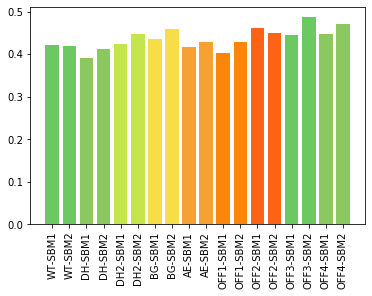

In [13]:
#Plot just for individual media (SBM)
samples = [i for i in paramsdf.index if (i.find("SBM") != -1) and (i.find("Blank") == -1)]
data = paramsdf.loc[samples]
plt.bar(data.index, data["growth rate"], color = clist)
plt.xticks(rotation = 90)
plt.savefig("growthrates.svg")